In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



Linear Regression MSE after PCA: 16592341.42591603


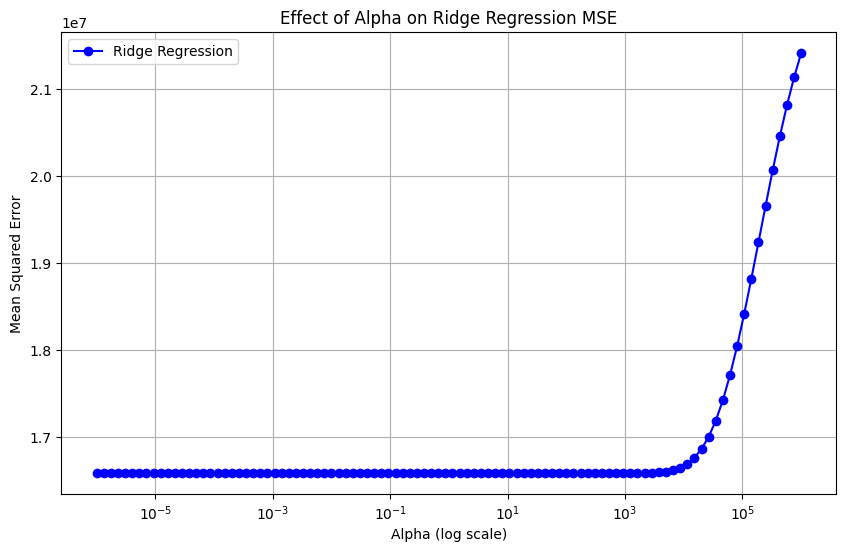

Best alpha: 1232.8467394420684
Ridge Regression MSE with best alpha (1232.8467394420684): 16589351.694316193


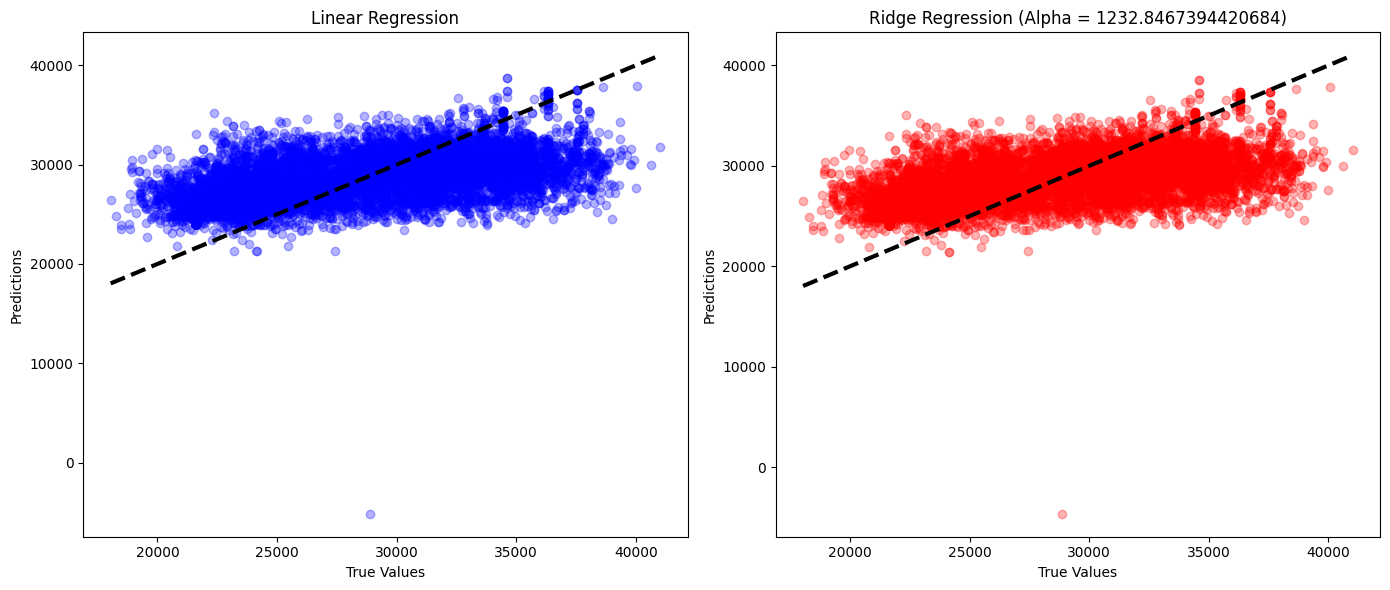

In [14]:
# Load data
data = pd.read_csv('powerpredict.csv')

# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=[
    'Bedrock_weather_main', 'Bedrock_weather_description', 
    'Gotham City_weather_main', 'Gotham City_weather_description', 
    'New New York_weather_description', 'New New York_weather_main', 
    'Springfield_weather_description', 'Springfield_weather_main', 
    'Paperopoli_weather_main', 'Paperopoli_weather_description'
], drop_first=True)

# Prepare features and target
X = data.drop('power_consumption', axis=1).values
y = data['power_consumption'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)
y_pred_lin = lin_reg.predict(X_test_pca)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f'Linear Regression MSE after PCA: {mse_lin}')

# Experiment with Ridge Regression
alphas = np.logspace(-6, 6, 100)  # 100 values from 10^-6 to 10^6
ridge_mse = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_pca, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_pca)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    ridge_mse.append(mse_ridge)

# Plot MSE vs. Alpha for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mse, marker='o', linestyle='-', color='b', label='Ridge Regression')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Alpha on Ridge Regression MSE')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha
best_alpha = alphas[np.argmin(ridge_mse)]
print(f'Best alpha: {best_alpha}')

# Train Ridge Regression with best alpha
ridge_reg_best = Ridge(alpha=best_alpha)
ridge_reg_best.fit(X_train_pca, y_train)
y_pred_ridge_best = ridge_reg_best.predict(X_test_pca)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
print(f'Ridge Regression MSE with best alpha ({best_alpha}): {mse_ridge_best}')

# Visualization of best Ridge Regression model
plt.figure(figsize=(14, 6))

# Plot true vs predicted power consumption for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

# Plot true vs predicted power consumption for Ridge Regression with best alpha
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge_best, alpha=0.3, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression (Alpha = {best_alpha})')

plt.tight_layout()
plt.show()

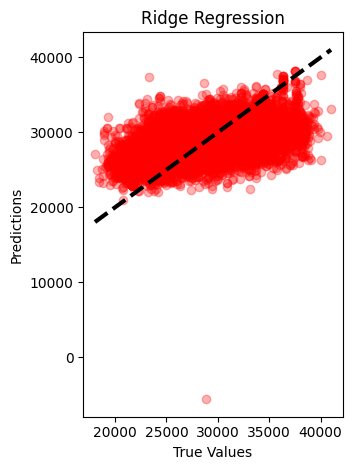

In [10]:
# Plot true vs predicted power consumption for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')

plt.tight_layout()
plt.show()


In [ ]:
# Ridge Regression with varying alpha values
alphas = np.logspace(-4, 4, 200)
train_errors = []
test_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error')
plt.plot(alphas, test_errors, label='Test Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Error vs Alpha')
plt.legend()
plt.show()



In [ ]:
# Plot coefficients for different alpha values
coefficients = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(14, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Coefficient {i}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs Alpha')
plt.legend()
plt.show()
